In [43]:
# Import Dependencies
import numpy as np
import pandas as pd
import sklearn
import os 

In [44]:
data_dir = 'data_reviews'
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

tr_text_list = x_train_df['text'].values.tolist()

# Flatten y_train to (n,) in order to supress scikit-learn warnings
y_train_flat = y_train_df.values.ravel()
print(y_train_flat.shape)

(2400,)


<font size="10">Preprocessing steps</font>

In [45]:
# !pip install nltk

In [46]:
# Import Dependencies
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/williamcrane-
[nltk_data]     morris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/williamcrane-
[nltk_data]     morris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
def preprocess_basic(sentences):
    ''' Basic Preprocessing Tokenizer that only removes punctuations and uppercases'''
    preprocessed_sentences = []

    for sentence in sentences:
        # Tokenize the sentence
        tokens = word_tokenize(sentence)

        # Remove punctuations
        filtered_tokens = [word.lower() for word in tokens if word.isalpha()]

        # Join the tokens back into a single string
        preprocessed_sentence = ' '.join(filtered_tokens)
        preprocessed_sentences.append(preprocessed_sentence)

    return preprocessed_sentences

In [48]:
def preprocess_stopwords(sentences):
    '''Basic Preprocessing Tokenizer that aslo removes stopwords'''
    preprocessed_sentences = []
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    for sentence in sentences:
        # Tokenize the sentence
        tokens = word_tokenize(sentence)

        # Remove stopwords and punctuation
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
        
        # Stemming (optional)
        # stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

        # Join the tokens back into a single string
        preprocessed_sentence = ' '.join(filtered_tokens)
        preprocessed_sentences.append(preprocessed_sentence)

    return preprocessed_sentences

<font size='10'>(Basic Preprocessing) Evaluate # Folds for CV</font>

In [49]:
# Import Dependencies
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [50]:
processed_reviews = preprocess_basic(tr_text_list)

In [51]:
# testing properties of the preprocessing 
print(tr_text_list[:100])
print(preprocess_basic(tr_text_list[1:2]))
print(processed_reviews[:100])

['Oh and I forgot to also mention the weird color effect it has on your phone.', "THAT one didn't work either.", 'Waste of 13 bucks.', 'Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.', 'None of the three sizes they sent with the headset would stay in my ears.', 'Worst customer service.', 'The Ngage is still lacking in earbuds.', 'It always cuts out and makes a beep beep beep sound then says signal failed.', 'the only VERY DISAPPOINTING thing was there was NO SPEAKERPHONE!!!!', 'Very disappointed in AccessoryOne.', 'Basically the service was very bad.', 'Bad Choice.', 'The only thing that disappoint me is the infra red port (irda).', 'horrible, had to switch 3 times.', 'It feels poorly constructed, the menus are difficult to navigate, and the buttons are so recessed that it is difficult to push them.', "Don't make the same mistake I did.", "Muddy, low quality sound, and the casing around the wire's insert was 

In [52]:
# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(processed_reviews)
 
# Print the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the processed reviews
x_processed = vectorizer.transform(processed_reviews)
 
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(x_processed.toarray())

print("size of vocabulary", vectorizer.get_feature_names_out().shape)

Vocabulary:  {'oh': 2572, 'and': 126, 'forgot': 1528, 'to': 3856, 'also': 103, 'mention': 2360, 'the': 3783, 'weird': 4196, 'color': 704, 'effect': 1208, 'it': 2013, 'has': 1735, 'on': 2586, 'your': 4313, 'phone': 2753, 'that': 3781, 'one': 2588, 'did': 1027, 'work': 4270, 'either': 1217, 'waste': 4162, 'of': 2564, 'bucks': 470, 'product': 2900, 'is': 2010, 'useless': 4061, 'since': 3406, 'does': 1093, 'not': 2535, 'have': 1740, 'enough': 1261, 'charging': 613, 'current': 903, 'charge': 608, 'cellphones': 584, 'was': 4159, 'planning': 2781, 'use': 4057, 'with': 4249, 'none': 2525, 'three': 3819, 'sizes': 3421, 'they': 3799, 'sent': 3310, 'headset': 1751, 'would': 4285, 'stay': 3571, 'in': 1912, 'my': 2470, 'ears': 1184, 'worst': 4280, 'customer': 908, 'service': 3326, 'ngage': 2510, 'still': 3593, 'lacking': 2107, 'earbuds': 1175, 'always': 106, 'cuts': 915, 'out': 2622, 'makes': 2284, 'beep': 324, 'sound': 3502, 'then': 3794, 'says': 3238, 'signal': 3391, 'failed': 1373, 'only': 2592,

<font size="5">Split training set into training and validation set</font>

In [53]:
x_train_processed, x_val_processed, y_train, y_val = train_test_split(x_processed, y_train_flat, test_size=0.2, random_state=42)
print(f'x_train shape = {x_train_processed.shape}')
print(f'y_train shape = {y_train.shape}')
print(f'x_val shape = {x_val_processed.shape}')
print(f'y_val shape = {y_val.shape}')

x_train shape = (1920, 4325)
y_train shape = (1920,)
x_val shape = (480, 4325)
y_val shape = (480,)


In [54]:
# Create Logistic Regression model
model = LogisticRegression()

# Define scoring function based on scikitlearn cross_val_score
def kfold_scores(model, x_tr, y_tr, cv=3, scoring='accuracy'):
    scores = cross_val_score(model, x_tr, y_tr, cv=cv, scoring=scoring)

    # Print the accuracy scores for each fold
    print(f'For Folds = {cv}')
    for i, score in enumerate(scores):
        print(f'Fold {i+1} - {scoring} score: {score:.2f}')
        
    # Calculate and print the mean accuracy and standard deviation
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    print(f'Mean {scoring} score: {mean_accuracy:.2f} \nStandard Deviation: {std_accuracy:.2f}')

In [55]:
def kfold_scores_silent(model, x_tr, y_tr, cv=3, scoring='accuracy'):
    scores = cross_val_score(model, x_tr, y_tr, cv=cv, scoring=scoring)

    return(scores)

In [56]:
scores_k03 = kfold_scores(model, x_train_processed, y_train, cv=3, scoring='roc_auc')

For Folds = 3
Fold 1 - roc_auc score: 0.86
Fold 2 - roc_auc score: 0.84
Fold 3 - roc_auc score: 0.88
Mean roc_auc score: 0.86 
Standard Deviation: 0.01


In [57]:
scores_k05 = kfold_scores(model, x_train_processed, y_train, cv=5, scoring='roc_auc')

For Folds = 5
Fold 1 - roc_auc score: 0.88
Fold 2 - roc_auc score: 0.85
Fold 3 - roc_auc score: 0.84
Fold 4 - roc_auc score: 0.87
Fold 5 - roc_auc score: 0.89
Mean roc_auc score: 0.87 
Standard Deviation: 0.02


In [58]:
scores_k10 = kfold_scores(model, x_train_processed, y_train, cv=10, scoring='roc_auc')

For Folds = 10
Fold 1 - roc_auc score: 0.88
Fold 2 - roc_auc score: 0.88
Fold 3 - roc_auc score: 0.83
Fold 4 - roc_auc score: 0.88
Fold 5 - roc_auc score: 0.85
Fold 6 - roc_auc score: 0.84
Fold 7 - roc_auc score: 0.90
Fold 8 - roc_auc score: 0.84
Fold 9 - roc_auc score: 0.91
Fold 10 - roc_auc score: 0.90
Mean roc_auc score: 0.87 
Standard Deviation: 0.03


In [59]:
scores_k15 = kfold_scores(model, x_train_processed, y_train, cv=15, scoring='roc_auc')

For Folds = 15
Fold 1 - roc_auc score: 0.89
Fold 2 - roc_auc score: 0.91
Fold 3 - roc_auc score: 0.85
Fold 4 - roc_auc score: 0.84
Fold 5 - roc_auc score: 0.88
Fold 6 - roc_auc score: 0.86
Fold 7 - roc_auc score: 0.88
Fold 8 - roc_auc score: 0.82
Fold 9 - roc_auc score: 0.86
Fold 10 - roc_auc score: 0.87
Fold 11 - roc_auc score: 0.90
Fold 12 - roc_auc score: 0.86
Fold 13 - roc_auc score: 0.91
Fold 14 - roc_auc score: 0.92
Fold 15 - roc_auc score: 0.88
Mean roc_auc score: 0.87 
Standard Deviation: 0.03


k = 5 seems sufficient (highest score, lowest std dev.)

In [60]:
import matplotlib.pyplot as plt

# n_folds = [3, 5, 10, 15]

# scores_list = []
# for i in n_folds:
#     scores_list.append(kfold_scores_silent(model, x_train_processed, y_train, cv=i, scoring='roc_auc'))

# fig, ax = plt.subplots()
# # plt.eventplot(scores_list, orientation='vertical')
# # plt.violinplot(scores_list)
# for i in range(len(n_folds)):
#     ax.plot(scores_list[i].mean())
    
# ax.xticks(range(len(n_folds)), labels=n_folds)
# plt.show()

<font size='10'>(Basic Preprocessing) Hyperparameter Selection with CV</font>

For now will use only easily available hyperparameter for sklearn's LogistRegression classifier:
- solver
- regularization/penalty
- c parameter

In [61]:
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [62]:
model = LogisticRegression(max_iter=200)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l1', 'l2', 'elasticnet']
penalty = ['l2'] # use l2 only since it's the only penalty supported by all 3 solvers
c_values = np.logspace(-5, 5, num=11)

grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
           

In [63]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, n_jobs=-1, scoring='roc_auc', return_train_score=True)
grid_result = grid_search.fit(x_train_processed, y_train)

In [64]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.866863 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.724480 (0.019752) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'newton-cg'}
0.724388 (0.020013) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'lbfgs'}
0.724659 (0.021137) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}
0.725137 (0.020066) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.725137 (0.020052) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.725489 (0.020805) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
0.733244 (0.019355) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.733260 (0.019327) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.733868 (0.020541) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.773424 (0.016454) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773424 (0.016467) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.773624 (0.016900) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Choosing Best Parameters as statedt by the GridSearch results: C = 1.0, solver = lbfgs

Now test with validation set

In [65]:
print(grid_result.cv_results_['mean_train_score'])
grid_result_df = pd.DataFrame.from_dict(grid_result.cv_results_)
grid_result_df
# print(grid_result)

[0.77844126 0.77837243 0.78072342 0.77973456 0.77973964 0.78164438
 0.79113076 0.79113992 0.79269503 0.85151897 0.85151864 0.85172582
 0.95171325 0.95171427 0.95171122 0.99545142 0.99545109 0.99544837
 0.99999559 0.99999559 0.99999559 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013402,0.003535,0.002510,0.000549,0.00001,l2,newton-cg,"{'C': 1e-05, 'penalty': 'l2', 'solver': 'newto...",0.739529,0.718248,...,0.724480,0.019752,32,0.777507,0.782877,0.775489,0.779528,0.776806,0.778441,0.002573
1,0.017926,0.001722,0.002341,0.000499,0.00001,l2,lbfgs,"{'C': 1e-05, 'penalty': 'l2', 'solver': 'lbfgs'}",0.739529,0.718275,...,0.724388,0.020013,33,0.777629,0.782907,0.775454,0.779060,0.776813,0.778372,0.002551
2,0.003614,0.000707,0.002077,0.000090,0.00001,l2,liblinear,"{'C': 1e-05, 'penalty': 'l2', 'solver': 'libli...",0.741699,0.716158,...,0.724659,0.021137,31,0.779114,0.789535,0.777530,0.777868,0.779570,0.780723,0.004470
3,0.018518,0.008011,0.002269,0.000163,0.0001,l2,newton-cg,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'newt...",0.740777,0.718465,...,0.725137,0.020066,30,0.778534,0.784262,0.776610,0.780982,0.778285,0.779735,0.002659
4,0.018573,0.001114,0.002350,0.000348,0.0001,l2,lbfgs,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.740777,0.718465,...,0.725137,0.020052,29,0.778536,0.784262,0.776606,0.780993,0.778302,0.779740,0.002659
5,0.004872,0.001973,0.002523,0.000366,0.0001,l2,liblinear,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'libl...",0.742377,0.716375,...,0.725489,0.020805,28,0.779909,0.789984,0.777895,0.779540,0.780894,0.781644,0.004281
6,0.031967,0.011253,0.004109,0.003912,0.001,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.748617,0.724028,...,0.733244,0.019355,27,0.788803,0.795273,0.787067,0.793249,0.791262,0.791131,0.002953
7,0.024477,0.005421,0.002538,0.000321,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.748589,0.724083,...,0.733260,0.019327,26,0.788805,0.795274,0.787067,0.793291,0.791262,0.791140,0.002959
8,0.005601,0.002117,0.002491,0.000331,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.749132,0.722183,...,0.733868,0.020541,25,0.790117,0.798918,0.787620,0.793213,0.793607,0.792695,0.003801
9,0.067375,0.017988,0.002960,0.001081,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.788574,0.758006,...,0.773424,0.016454,23,0.848878,0.852544,0.848313,0.851918,0.855942,0.851519,0.002758


In [66]:
print(grid_result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')


In [67]:
# print(grid_result_df['param_solver']['mean_test_score'])

(3,)


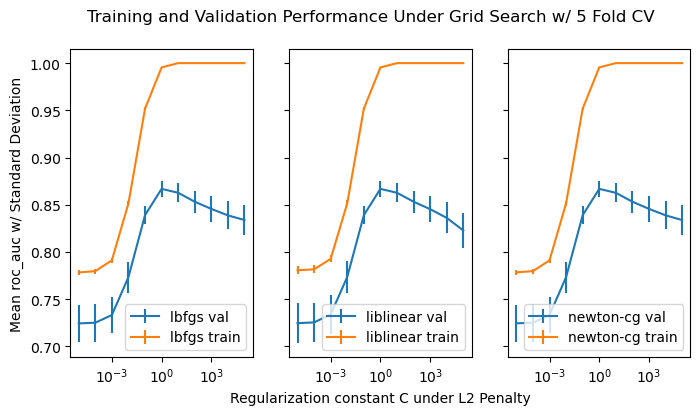

In [85]:
from collections import defaultdict
# dic = {}
fig, ax = plt.subplots(1,3, sharey=True, figsize=(8, 4))

print(ax.shape)
solvers = {'lbfgs' : 0, 'liblinear' : 1, 'newton-cg' : 2}
for solver, group in grid_result_df.groupby('param_solver'):
    ax[solvers[solver]].errorbar(group['param_C'], group['mean_test_score'], yerr=group['std_test_score'], label=f"{solver} val")
    ax[solvers[solver]].errorbar(group['param_C'], group['mean_train_score'], yerr=group['std_train_score'], label=f"{solver} train")


    
# ax.scatter(grid_result_df.sort_values(['param_C'])['param_C'], grid_result_df.sort_values(['param_C'])['mean_test_score'],)
ax[0].set_ylabel("Mean roc_auc w/ Standard Deviation")
ax[1].set_xlabel("Regularization constant C under L2 Penalty")
fig.suptitle("Training and Validation Performance Under Grid Search w/ 5 Fold CV")

for i in range(3):
    ax[i].set_xscale('log')
    
    ax[i].legend()
    ax[i].label_outer
plt.show()


In [69]:
chosen_penalty = 'l2'
chosen_solver = 'lbfgs'
chosen_c_value = 1.0

In [70]:
chosen_model = LogisticRegression(penalty=chosen_penalty, solver=chosen_solver, C=chosen_c_value)
chosen_model.fit(x_train_processed, y_train)
yhat_val = chosen_model.predict(x_val_processed)

In [71]:
display(yhat_val)

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [72]:
display(y_val)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [73]:
# sanity check if prediction is 100% accuarate
np.allclose(yhat_val, y_val)

False

In [74]:
#### Don't use this, this uses actual boolean values instead of the probas
# RocCurveDisplay.from_predictions(y_val, yhat_val)
# plt.show()

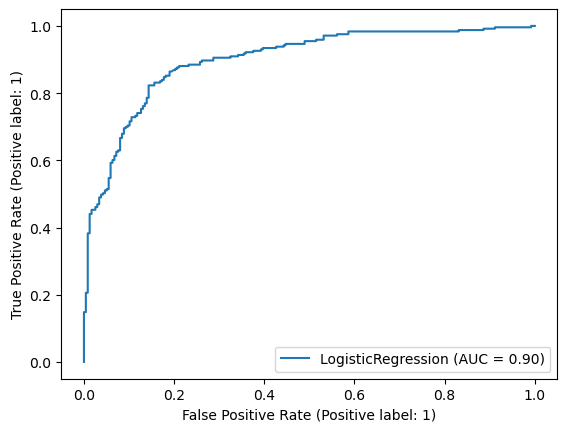

In [75]:
RocCurveDisplay.from_estimator(chosen_model, x_val_processed, y_val)
plt.show()

In [76]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, yhat_val)

array([[198,  39],
       [ 41, 202]])

In [114]:
fp_inds = []
fn_inds = []
for i in range(y_val.shape[0]):
    if (y_val[i] == 0 and yhat_val[i] == 1):
        fp_inds.append(i)
    elif (y_val[i] == 1 and yhat_val[i] == 0):
        fn_inds.append(i)

print("fps", len(fp_inds)) #sanity check
print("fns", len(fn_inds))

# print(x_val_processed[1])
print(x_processed.shape)

fps 39
fns 41
(2400, 4325)


In [104]:
orig_inds = np.arange(x_processed.shape[0])
filler_ys = np.zeros(x_processed.shape[0])
# x_train_processed, x_val_processed, y_train, y_val = train_test_split(x_processed, y_train_flat, test_size=0.2, random_state=42)
x_train_inds, x_val_inds, y_train_dummy, y_val_dummy = train_test_split(orig_inds, filler_ys, test_size=.2, random_state=42)
val_to_orig_ind_dict = {}
for i in range(len(x_val_inds)):
    val_to_orig_ind_dict[i] = x_val_inds[i]


recovering the original text from our ids to examine false positives and negatives

In [105]:
# print(tr_text_list[x_val_inds[fp_inds[4]]])
for i in fp_inds:
    print(val_to_orig_ind_dict[i], tr_text_list[val_to_orig_ind_dict[i]])

1198 The results, well, are a shame.  
218 Kind of flops around.
1105 Not easy to watch.  
941 Highly unrecommended.  
962 His co-stars don't fare much better, with people like Morgan Freeman, Jonah Hill, and Ed Helms just wasted.  
1055 i wouldnt see this movie again for free.  
237 You need at least 3 mins to get to your phone book from the time you first turn on the phone.Battery life is short.
1161 Your brain will attempt to shut-down as part of a primal impulse of self-preservation.  
821 My only problem is I thought the actor playing the villain was a low rent Michael Ironside.  
1641 The scallop dish is quite appalling for value as well.
188 Echo Problem....Very unsatisfactory
819 NOBODY identifies with these characters because they're all cardboard cutouts and stereotypes (or predictably reverse-stereotypes).  
1730 The Heart Attack Grill in downtown Vegas is an absolutely flat-lined excuse for a restaurant.
279 The plastic breaks really easy on this clip.
940 The film lacks an

In [119]:
avg_rev_len = 0
rev_lens = []
for review in tr_text_list:
    avg_rev_len += len(review)
    rev_lens.append(len(review))
avg_rev_len = avg_rev_len / len(tr_text_list)
print("avg review length", avg_rev_len, np.std(rev_lens))

fp_lens = []
avg_fp_len = 0
for i in fp_inds:
    avg_fp_len += len(tr_text_list[val_to_orig_ind_dict[i]])
    fp_lens.append(len(tr_text_list[val_to_orig_ind_dict[i]])) 
avg_fp_len = avg_fp_len / len(fp_inds)

print("avg fp review len", avg_fp_len, np.std(fp_lens))

avg_fn_len = 0
fn_lens = []
for i in fn_inds:
    avg_fn_len += len(tr_text_list[val_to_orig_ind_dict[i]])
    fn_lens.append(len(tr_text_list[val_to_orig_ind_dict[i]]))

avg_fn_len = avg_fn_len / len(fn_inds)

print("avg fn review len", avg_fn_len, "stdev", np.std(fn_lens))

avg review length 65.34416666666667 43.123493782069914
avg fp review len 69.05128205128206 39.375215892252236
avg fn review len 54.951219512195124 stdev 32.383337494663486


In [106]:
for i in fn_inds:
    print(val_to_orig_ind_dict[i], tr_text_list[val_to_orig_ind_dict[i]])

1289 It was clear that she had the range and ability to pull off this part.  
1521 All in all I give this one a resounding 9 out of 10.  
1565 Highly recommended for all ages, although the younger set will probably not appreciate some of the more subtle references, they will certainly appreciate one galley scene in particular!  
1301 I advise you to look out for it.  
2054 Def coming back to bowl next time
2024 This place has it!
2095 I can assure you that you won't be disappointed.
518 Someone shouldve invented this sooner.
422 Plantronics Bluetooth Excelent Buy.
2217 It was just not a fun experience.
2180 If you want healthy authentic or ethic food, try this place.
1336 I will never forget it now.  
1583 Not too screamy not to masculine but just right.  
522 Comfort for our whole family.
2138 The only good thing was our waiter, he was very helpful and kept the bloddy mary's coming.
1596 I would have casted her in that role after ready the script.  
2097 Not to mention the combination

In [77]:
# predict_proba
yhat_proba_val = chosen_model.predict_proba(x_val_processed)
display(yhat_proba_val)

array([[1.03729974e-01, 8.96270026e-01],
       [5.83814841e-01, 4.16185159e-01],
       [8.41774643e-01, 1.58225357e-01],
       [6.24938124e-01, 3.75061876e-01],
       [2.90861418e-01, 7.09138582e-01],
       [7.82078823e-01, 2.17921177e-01],
       [2.68215030e-01, 7.31784970e-01],
       [9.09427857e-01, 9.05721428e-02],
       [7.81662138e-01, 2.18337862e-01],
       [7.88962405e-01, 2.11037595e-01],
       [9.19868497e-01, 8.01315032e-02],
       [5.35424245e-01, 4.64575755e-01],
       [2.77085390e-01, 7.22914610e-01],
       [3.49502858e-01, 6.50497142e-01],
       [5.98987693e-01, 4.01012307e-01],
       [7.87265908e-01, 2.12734092e-01],
       [8.21958057e-01, 1.78041943e-01],
       [8.95533561e-01, 1.04466439e-01],
       [5.28800301e-01, 4.71199699e-01],
       [7.55941850e-01, 2.44058150e-01],
       [7.23350473e-01, 2.76649527e-01],
       [4.28371098e-03, 9.95716289e-01],
       [8.84223750e-01, 1.15776250e-01],
       [7.69162261e-02, 9.23083774e-01],
       [3.151174

In [78]:
# calculate actual roc_auc score
roc_auc_score(y_val, yhat_proba_val[:, 1]) # proba format is [False, True] (since it's [0,1])

0.8987254953030854

In [79]:
# print to text file
np.savetxt('y_proba1_val.txt', yhat_proba_val) # don't add delimeter, since the load can't take delimiter

In [80]:
# test load saved text file
np.loadtxt('y_proba1_val.txt')

array([[1.03729974e-01, 8.96270026e-01],
       [5.83814841e-01, 4.16185159e-01],
       [8.41774643e-01, 1.58225357e-01],
       [6.24938124e-01, 3.75061876e-01],
       [2.90861418e-01, 7.09138582e-01],
       [7.82078823e-01, 2.17921177e-01],
       [2.68215030e-01, 7.31784970e-01],
       [9.09427857e-01, 9.05721428e-02],
       [7.81662138e-01, 2.18337862e-01],
       [7.88962405e-01, 2.11037595e-01],
       [9.19868497e-01, 8.01315032e-02],
       [5.35424245e-01, 4.64575755e-01],
       [2.77085390e-01, 7.22914610e-01],
       [3.49502858e-01, 6.50497142e-01],
       [5.98987693e-01, 4.01012307e-01],
       [7.87265908e-01, 2.12734092e-01],
       [8.21958057e-01, 1.78041943e-01],
       [8.95533561e-01, 1.04466439e-01],
       [5.28800301e-01, 4.71199699e-01],
       [7.55941850e-01, 2.44058150e-01],
       [7.23350473e-01, 2.76649527e-01],
       [4.28371098e-03, 9.95716289e-01],
       [8.84223750e-01, 1.15776250e-01],
       [7.69162261e-02, 9.23083774e-01],
       [3.151174